<h1>Exploratory Data Analysis</h1>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [73]:
plt.style.use('ggplot')

In [74]:
df = pd.read_csv('cleaned_dataset_killed.csv')
df

,age,race,date,state,police_agency,description of death,was armed,weapon on victim,geography type,male,shooting_involved,taser_involved,physical_violence_involved,justified,armed_with_gun,armed_with_knife,was_a_threat,was_fleeing,mental_illness
0,66.0,Hispanic,2020-11-18 00:00:00,TX,Tyler Junior College Police Department,Martinez allegedly approached a Tyler Junior C...,Allegedly Armed,unknown weapon,NaN,1.0,1,0,0,NaN,0.0,0.0,0.0,0.0,0.0
1,28.0,White,2020-11-17 00:00:00,FL,"St. Augustine Police Department, St. Johns Cou...",Police were called to a home where a man was a...,Allegedly Armed,gun,NaN,1.0,1,0,0,NaN,1.0,0.0,1.0,NaN,0.0
2,35.0,White,2020-11-14 00:00:00,NH,Meredith Police Department,David Donovan was shot by a Meredith police of...,Unclear,undetermined,Rural,1.0,1,0,0,NaN,0.0,0.0,NaN,NaN,0.0
3,38.0,Hispanic,2020-11-14 00:00:00,CA,Sacramento Police Department,"Around 8 p.m., officers responded to reports o...",Allegedly Armed,gun,Urban,1.0,1,0,0,NaN,1.0,0.0,NaN,NaN,NaN
4,40.0,White,2020-11-14 00:00:00,FL,Escambia County Sheriff's Office,Deputies were serving a warrant to Jake Settle...,Vehicle,vehicle,Suburban,1.0,1,0,0,NaN,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,NaN,NaN,2020-11-27,OR,NaN,NaN,gun,NaN,NaN,1.0,1,0,0,NaN,1.0,NaN,0.0,NaN,NaN
9720,43.0,Black,2020-11-29,LA,NaN,NaN,gun,NaN,NaN,1.0,1,0,0,NaN,1.0,NaN,1.0,0.0,NaN
9721,NaN,NaN,2020-11-30,AZ,NaN,NaN,BB gun,NaN,NaN,1.0,1,0,0,NaN,1.0,NaN,1.0,0.0,NaN
9722,38.0,Hispanic,2020-11-30,TX,NaN,NaN,knife,NaN,NaN,1.0,1,0,0,NaN,NaN,1.0,0.0,0.0,NaN


In [75]:
df['date'] = pd.to_datetime(df['date'])

<h1>1) Analysing time

In [76]:
df['year'] = df['date'].apply(lambda x: x.year)

In [77]:
df.groupby('year').size()

year
2013     899
2014     965
2015    1425
2016    1334
2017    1341
2018    1330
2019    1234
2020    1196
dtype: int64

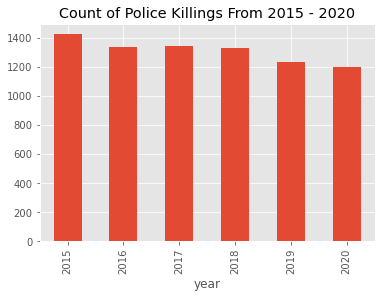

In [78]:
df[(df.year != 2013) & (df.year != 2014)].groupby('year').size().plot(kind='bar', title='Count of Police Killings From 2015 - 2020')


#we plot from 2015 onwards even though our data is from 2013 onwards bc we have more comprehensive data (from the washington post database) only from 2015 onwards -> 2013 and 2014 data are not comprehensive enough (not all deaths tracked)

#conclusion: we see that the number of police killings have fallen by 28.5% from 2015 to 2020


<h1>2) Analysing race

<h4>Proportion of races amongst police killing victims

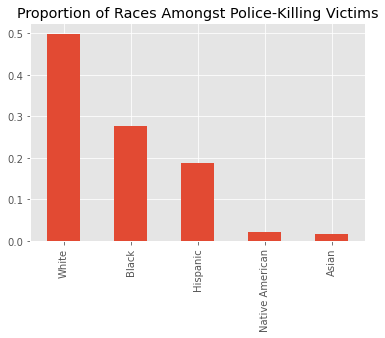

In [79]:
proportion_of_races_killed = df.race.value_counts(normalize=True)
proportion_of_races_killed.plot(kind='bar', title='Proportion of Races Amongst Police-Killing Victims')


#50% of those killed are White! BUT- see below

#we see that the main 3 races killed are white, black, and hispanic, so we focus our following analysis on these races only


<h4>Rate at which each race is killed in the general population</h4>
<br>
Statistics used:
<br>1) USA population: 331 million
<br>2) Proportion of each race in USA population: Taken from https://www.statista.com/statistics/183489/population-of-the-us-by-ethnicity-since-2000/
    <li>White: 65%
    <li>Black: 13%
    <li>Hispanic: 18%


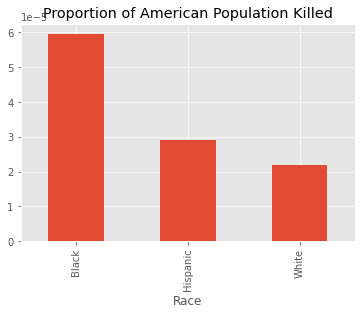

In [80]:
whites_killed_in_millions = len(df[df.race == 'White']) / (10**6) 
blacks_killed_in_millions = len(df[df.race == 'Black']) / (10**6)  
hispanics_killed_in_millions = len(df[df.race == 'Hispanic']) / (10**6) 

proportion_of_each_race_killed = [('White', whites_killed_in_millions/(331*0.64)), ('Black', blacks_killed_in_millions/(331*0.13)), ('Hispanic', hispanics_killed_in_millions/(331*0.18))]
rate_df = pd.DataFrame(proportion_of_each_race_killed, columns=['Race', 'rate of police killing'])
rate_df.set_index('Race', inplace=True)

rate_df.sort_values(by='rate of police killing', ascending=False).plot(kind='bar', title='Proportion of American Population Killed', legend=None)


#we see that all other races are killed at disproportionate rates compared to whites. most strikingly, blacks are killed at almost 3 times the rate of whites


<h3>Analysis across last 5 years (2015- 2019)</h3>
2020 not analysed bc no data compiled on criminal offenders in 2020 yet
    

<h4>Rate at which each race is killed among criminal offenders, over time</h4>
Statistics taken from https://ucr.fbi.gov/crime-in-the-u.s for each year

In [81]:
yearly_data_of_races_killed = []

for year, data in df[(df.year != 2013) & (df.year != 2014) & (df.year != 2020)].groupby('year')['race']:
    whites_killed_in_millions = len(data == 'White') / (10**6)
    blacks_killed_in_millions = len(data == 'Black') / (10**6)
    hispanics_killed_in_millions = len(data == 'Hispanic') / (10**6)
    yearly_data_of_races_killed.append([whites_killed_in_millions, blacks_killed_in_millions, hispanics_killed_in_millions])
    

In [82]:
yearly_data_of_races_killed

[[0.001425, 0.001425, 0.001425],
 [0.001334, 0.001334, 0.001334],
 [0.001341, 0.001341, 0.001341],
 [0.00133, 0.00133, 0.00133],
 [0.001234, 0.001234, 0.001234]]

In [83]:
#the following stats are in the format of: [white_criminal_offenders_in_millions, black_criminal_offenders_in_millions, hispanic_criminal_offenders_in_millions]

twentyfifteen_stats = [5.7, 2.2, 1.2]
twentysixteen_stats = [5.8, 2.2, 1.2]
twentyseventeen_stats = [5.6, 2.2, 1.2]
twentyeighteen_stats = [5.3, 2.1, 1.2]
twentynineteen_stats = [4.9, 1.8, 1.1]

division_array = np.array([twentyfifteen_stats, twentysixteen_stats, twentyseventeen_stats, twentyeighteen_stats, twentynineteen_stats])
division_array                           

array([[5.7, 2.2, 1.2],
       [5.8, 2.2, 1.2],
       [5.6, 2.2, 1.2],
       [5.3, 2.1, 1.2],
       [4.9, 1.8, 1.1]])

In [84]:
proportion_of_criminal_offenders_killed_by_race = np.array(yearly_data_of_races_killed) / division_array  #element-wise operation


In [85]:
yearly_df = pd.DataFrame(proportion_of_criminal_offenders_killed_by_race, columns=['proportion_of_white_criminal_offenders_killed', 'proportion_of_black_criminal_offenders_killed', 'proportion_of_hispanic_criminal_offenders_killed'])
yearly_df['Year'] = ['2015', '2016', '2017', '2018', '2019']
yearly_df


,proportion_of_white_criminal_offenders_killed,proportion_of_black_criminal_offenders_killed,proportion_of_hispanic_criminal_offenders_killed,Year
0,0.000250,0.000648,0.001188,2015
1,0.000230,0.000606,0.001112,2016
2,0.000239,0.000610,0.001118,2017
3,0.000251,0.000633,0.001108,2018
4,0.000252,0.000686,0.001122,2019


In [86]:
yearly_df.set_index('Year', inplace=True)

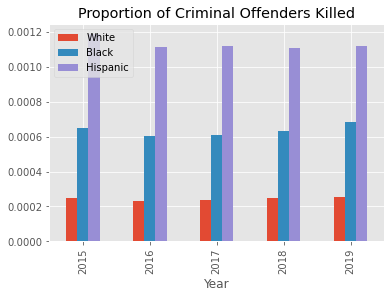

In [87]:
yearly_df.plot(kind='bar', title='Proportion of Criminal Offenders Killed')
plt.legend(['White', 'Black', 'Hispanic'])


#conclusion: across the last 5 years, the trend has remained strong that black criminal offenders are killed at approx 2.5 times the rate of white criminal offenders, and hispanic criminal offenders are killed at approx 4 times the rate of white criminal offenders.
#this shows a disproportionate rate at which police are consistently killing criminal offenders over the past 5 years


In [88]:
df.drop('year', axis = 'columns', inplace = True)

<h1>Analysing description of death

In [89]:
df = df[~df['description of death'].isnull()]

<h3>1) Create wordcloud: To identify the most common circumstances surrounding police killings

In [90]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
#create 'text': 1 long string containing all the descriptions of death

text_list = []
for i in df['description of death']:
    text_list.append(i)
text = ' '.join(text_list)

In [92]:
#clean 'text' var

for char in ['/', '\\']:
    text = text.replace(char, '')

text = text.lower()

In [93]:
text

'martinez allegedly approached a tyler junior college employee with a weapon. an officer came to the scene, engaged with martinez, and shot him. police were called to a home where a man was attempting to leave and other people were attempting to stop him from leaving. sjso and sapd officers arrived to the scene. they entered the residence and found acosta allegedly holding a gun and acting despondent. acosta allegedly pointed the gun at officers and sapd sgt. kevin carroll and sjso deputy kristapher james shot acosta. david donovan was shot by a meredith police officer. three people were hurt before police arrived. details as to what precipitated the killing were withheld by police. the shooting occurred around 10 p.m. in a residential area behind the meredith village cemetery, less than a tenth of a mile from the meredith police station. around 8 p.m., officers responded to reports of vehicles being driven recklessly and, upon arrival, saw a large crowd of people running from a buildi

In [94]:
#remove unwanted words from wordcloud

words_to_remove = ['agent', 'pair', 'says', 'returned', 'time', 'began', 'details', 'responding', 'three', 'department', 'came', 'killed', 'police', 'allegedly', 'report', 'officer', 'officers', 'said', 'deputy', 'deputies', 'p.m.', 'one', 'tried', 'suspect', 'year', 'old', 'saw', 'call', 'person', 'around', 'killing', 'arrived', 'authorities', 'according', 'responded', 'wanted', 'fatally', 'say', 'got', 'pointed', 'two', 'attempted', 'another', 'county', 'sheriff', 'trooper', 'scene', 'approached', 's', 'p', 'm', 'edly', 't', 'wo', 'ed', 'went', 'told', 'reported', 'reportedly', 'near', 'called', 'died'] + list(STOPWORDS)


(-0.5, 2999.5, 2999.5, -0.5)

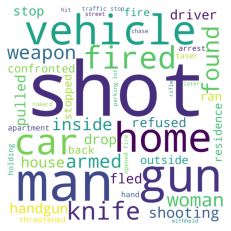

In [95]:
#create wordcloud
wordcloud = WordCloud(stopwords=words_to_remove,background_color='white',width=3000,height=3000, max_words=45).generate(text)

plt.imshow(wordcloud)
plt.axis('off')


<h3>3) Topic Analysis using LDA (Latent Dirichlet Allocation Model):</h3>
<br>To identify the major topics in circumstances surrounding police killings¶

In [96]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS

In [97]:
text_list = []
for i in df['description of death']:
    text_list.append(i)

In [98]:
#create a nested list: outermost list is for each text, inner list is a list of words in each text 

words_to_remove = ['agent', 'pair', 'says', 'returned', 'time', 'began', 'details', 'responding', 'three', 'department', 'came', 'killed', 'police', 'allegedly', 'report', 'officer', 'officers', 'said', 'deputy', 'deputies', 'p.m.', 'one', 'tried', 'suspect', 'year', 'old', 'saw', 'call', 'person', 'around', 'killing', 'arrived', 'authorities', 'according', 'responded', 'wanted', 'fatally', 'say', 'got', 'pointed', 'two', 'attempted', 'another', 'county', 'sheriff', 'trooper', 'scene', 'approached', 's', 'p', 'm', 'edly', 't', 'wo', 'ed', 'went', 'told', 'reported', 'reportedly', 'near', 'called', 'died'] + list(STOPWORDS)

texts = [[word for word in word_tokenize(text.lower())
        if word not in words_to_remove and word.isalnum()]
        for text in text_list]


In [99]:
texts

[['martinez',
  'tyler',
  'junior',
  'college',
  'employee',
  'weapon',
  'engaged',
  'martinez',
  'shot'],
 ['home',
  'man',
  'attempting',
  'leave',
  'people',
  'attempting',
  'stop',
  'leaving',
  'sjso',
  'sapd',
  'entered',
  'residence',
  'acosta',
  'holding',
  'gun',
  'acting',
  'despondent',
  'acosta',
  'gun',
  'sapd',
  'sgt',
  'kevin',
  'carroll',
  'sjso',
  'kristapher',
  'james',
  'shot',
  'acosta'],
 ['david',
  'donovan',
  'shot',
  'meredith',
  'people',
  'hurt',
  'precipitated',
  'withheld',
  'shooting',
  'occurred',
  '10',
  'residential',
  'area',
  'meredith',
  'village',
  'cemetery',
  'tenth',
  'mile',
  'meredith',
  'station'],
 ['8',
  'reports',
  'vehicles',
  'driven',
  'recklessly',
  'arrival',
  'large',
  'crowd',
  'people',
  'running',
  'building',
  'man',
  'armed',
  'gun',
  'area',
  'confronted',
  'armed',
  'man',
  'pointing',
  'gun',
  'crowd',
  'people',
  'inside',
  'warehouse',
  'shot'],
 ['se

In [100]:
dictionary = corpora.Dictionary(texts) #a dict of (word_id, word) pairs
corpus = [dictionary.doc2bow(text) for text in texts]  #gives (word_id, freq) pairs by each story. is a list of lists: outer list is each story in 'texts', inner list is each (word_id, freq) pairs in a story 


In [101]:
lda = LdaModel(corpus, id2word=dictionary, num_topics=2, passes=70)

In [102]:
def draw_wordcloud(lda, topicnum):
    word_list=[]
    prob_total = 0
    
    for word, prob in lda.show_topic(topicnum, topn=50):  #gives the top 50 words associated with the topicnum
        prob_total += prob  #need the for loop to get this prob_total first for use in the next (same) for loop
    
    for word, prob in lda.show_topic(topicnum, topn=50):
        freq = int(prob/prob_total*100)
        alist=[word]
        word_list.extend(alist*freq)  
    
    from random import shuffle
    shuffle(word_list)
    text = ' '.join(word_list)  
    return text

(-0.5, 2999.5, 2999.5, -0.5)

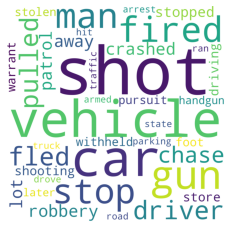

In [103]:
#draw wordcloud for top terms in topic 0
words_to_remove = ['agent', 'pair', 'says', 'returned', 'time', 'began', 'details', 'responding', 'three', 'department', 'came', 'killed', 'police', 'allegedly', 'report', 'officer', 'officers', 'said', 'deputy', 'deputies', 'p.m.', 'one', 'tried', 'suspect', 'year', 'old', 'saw', 'call', 'person', 'around', 'killing', 'arrived', 'authorities', 'according', 'responded', 'wanted', 'fatally', 'say', 'got', 'pointed', 'two', 'attempted', 'another', 'county', 'sheriff', 'trooper', 'scene', 'approached', 's', 'p', 'm', 'edly', 't', 'wo', 'ed', 'went', 'told', 'reported', 'reportedly', 'near', 'called', 'died'] + list(STOPWORDS)
text = draw_wordcloud(lda, 0)

wordcloud = WordCloud(stopwords=words_to_remove,width=3000,height=3000, background_color='white',max_words=45).generate(text)

plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 2999.5, 2999.5, -0.5)

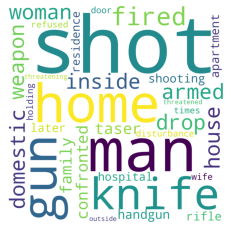

In [104]:
#draw wordcloud for top terms in topic 1
words_to_remove = ['agent', 'pair', 'says', 'returned', 'time', 'began', 'details', 'responding', 'three', 'department', 'came', 'killed', 'police', 'allegedly', 'report', 'officer', 'officers', 'said', 'deputy', 'deputies', 'p.m.', 'one', 'tried', 'suspect', 'year', 'old', 'saw', 'call', 'person', 'around', 'killing', 'arrived', 'authorities', 'according', 'responded', 'wanted', 'fatally', 'say', 'got', 'pointed', 'two', 'attempted', 'another', 'county', 'sheriff', 'trooper', 'scene', 'approached', 's', 'p', 'm', 'edly', 't', 'wo', 'ed', 'went', 'told', 'reported', 'reportedly', 'near', 'called', 'died'] + list(STOPWORDS)
text = draw_wordcloud(lda, 1)

wordcloud = WordCloud(stopwords=words_to_remove,width=3000,height=3000, background_color='white',max_words=45).generate(text)

plt.imshow(wordcloud)
plt.axis('off')


<h3>from analysing the above word clouds, we see 2 main situations (topics) surrounding police killings:</h3>
<br>1) police killings taking place in peoples' homes / involving family members
<br>2) police killings in traffic, involving vehicles

<h3>create new variables in df based on text mining results

<b>1) create a new var, 'home_involved', which shows whether the victim was killed by the police near/ at his residence


In [105]:
lda.print_topics(num_words=200)[1]

(1,
 '0.044*"shot" + 0.028*"man" + 0.020*"home" + 0.018*"gun" + 0.013*"knife" + 0.009*"fired" + 0.008*"armed" + 0.008*"woman" + 0.007*"house" + 0.007*"domestic" + 0.007*"inside" + 0.007*"weapon" + 0.007*"drop" + 0.005*"disturbance" + 0.005*"apartment" + 0.005*"refused" + 0.005*"911" + 0.004*"threatened" + 0.004*"family" + 0.004*"shooting" + 0.004*"residence" + 0.004*"confronted" + 0.004*"holding" + 0.004*"times" + 0.004*"threatening" + 0.004*"shots" + 0.004*"outside" + 0.004*"handgun" + 0.004*"door" + 0.003*"later" + 0.003*"wife" + 0.003*"hospital" + 0.003*"rifle" + 0.003*"taser" + 0.003*"standoff" + 0.003*"suicidal" + 0.003*"reports" + 0.003*"received" + 0.003*"commands" + 0.003*"death" + 0.002*"shotgun" + 0.002*"shoot" + 0.002*"mother" + 0.002*"tasered" + 0.002*"entered" + 0.002*"charged" + 0.002*"multiple" + 0.002*"ordered" + 0.002*"encountered" + 0.002*"kill" + 0.002*"dead" + 0.002*"violence" + 0.002*"people" + 0.002*"opened" + 0.002*"dispute" + 0.002*"swat" + 0.002*"hand" + 0.002*

In [106]:
matches = ['home', 'house', 'domestic', 'apartment ', 'family', 'residence', 'complex', 'neighbor', 
'wife', 'mother', 'girlfriend', 'son', 'father', 'children', 'neighbors', 'husband', 'bedroom', 'brother', 'daughter', 'residential']

from nltk import word_tokenize
home_involved = []
for index in df.index:
    row = df.loc[index]
    if row['description of death'] is not np.nan:
        lis = word_tokenize(row['description of death'].lower())
        if any(x in lis for x in matches):
            home_involved.append(1)
        else:
            home_involved.append(0)
    else:
        home_involved.append(np.nan)

df['home_involved'] = home_involved


<ipython-input-106-616ab500e211>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_involved'] = home_involved


<b>2) create a new var, 'vehicle_involved', which shows whether the victim was in a vehicle when he was killed by the police


In [107]:
lda.print_topics(num_words=200)[0]

(0,
 '0.041*"shot" + 0.023*"vehicle" + 0.021*"car" + 0.012*"gun" + 0.011*"man" + 0.011*"stop" + 0.009*"fired" + 0.008*"chase" + 0.007*"fled" + 0.007*"driver" + 0.006*"pulled" + 0.006*"traffic" + 0.006*"shooting" + 0.005*"stopped" + 0.005*"ran" + 0.005*"foot" + 0.004*"patrol" + 0.004*"robbery" + 0.004*"driving" + 0.004*"store" + 0.004*"arrest" + 0.004*"parking" + 0.004*"stolen" + 0.004*"lot" + 0.004*"away" + 0.004*"pursuit" + 0.004*"truck" + 0.003*"warrant" + 0.003*"armed" + 0.003*"handgun" + 0.003*"later" + 0.003*"withheld" + 0.003*"crashed" + 0.003*"state" + 0.003*"hit" + 0.003*"drove" + 0.003*"road" + 0.003*"led" + 0.003*"opened" + 0.003*"spotted" + 0.003*"gunfire" + 0.003*"shots" + 0.003*"men" + 0.003*"chased" + 0.003*"precipitated" + 0.003*"area" + 0.003*"ended" + 0.003*"weapon" + 0.003*"pursued" + 0.003*"people" + 0.002*"passenger" + 0.002*"suspected" + 0.002*"street" + 0.002*"highway" + 0.002*"multiple" + 0.002*"station" + 0.002*"troopers" + 0.002*"turned" + 0.002*"caught" + 0.00

In [108]:
matches = ['vehicle', 'car', 'driver', 'traffic', 'driving', 'parking', 'lot', 'truck', 'drove', 'crashed', 'road', 'passenger', 'highway', 'vehicles', 'cars', 'drive', 'rammed', 'parked', 'carjacking', 'driven']

from nltk import word_tokenize
vehicle_involved = []
for index in df.index:
    row = df.loc[index]
    if row['description of death'] is not np.nan:
        lis = word_tokenize(row['description of death'].lower())
        if any(x in lis for x in matches):
            vehicle_involved.append(1)
        else:
            vehicle_involved.append(0)
    else:
        vehicle_involved.append(np.nan)

df['vehicle_involved'] = vehicle_involved


<ipython-input-108-a9df43ae85dc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vehicle_involved'] = vehicle_involved


In [109]:
#use cols 'was armed' and 'weapon on victim' to enhance the 'vehicle_involved' col: bc there are rows with empty 'description of death', so we are unable to figure out whether a vehicle was involved using the descriptions for these rows. need to use these 2 other cols as well to figure out

matches = ['vehicle', 'car']

from nltk import word_tokenize
for index in df.index:
    row = df.loc[index]
    if row['weapon on victim'] is not np.nan and row['was armed'] is not np.nan:
        lis = word_tokenize(row['weapon on victim'].lower()) + word_tokenize(row['was armed'].lower())
        if any(x in lis for x in matches):
            row.loc['vehicle_involved'] = 1.0  #row is now changed but df is not yet changed
            df.loc[index] = row  #change df in-place


/Users/sheila/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-109-c0ed7bbf3515>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row.loc['vehicle_involved'] = 1.0  #row is now changed but df is not yet changed
/Users/sheila/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

<b>3) enhance 'was fleeing' col using 'description of death' col

In [110]:
lda.print_topics(num_words=200)[0]

(0,
 '0.041*"shot" + 0.023*"vehicle" + 0.021*"car" + 0.012*"gun" + 0.011*"man" + 0.011*"stop" + 0.009*"fired" + 0.008*"chase" + 0.007*"fled" + 0.007*"driver" + 0.006*"pulled" + 0.006*"traffic" + 0.006*"shooting" + 0.005*"stopped" + 0.005*"ran" + 0.005*"foot" + 0.004*"patrol" + 0.004*"robbery" + 0.004*"driving" + 0.004*"store" + 0.004*"arrest" + 0.004*"parking" + 0.004*"stolen" + 0.004*"lot" + 0.004*"away" + 0.004*"pursuit" + 0.004*"truck" + 0.003*"warrant" + 0.003*"armed" + 0.003*"handgun" + 0.003*"later" + 0.003*"withheld" + 0.003*"crashed" + 0.003*"state" + 0.003*"hit" + 0.003*"drove" + 0.003*"road" + 0.003*"led" + 0.003*"opened" + 0.003*"spotted" + 0.003*"gunfire" + 0.003*"shots" + 0.003*"men" + 0.003*"chased" + 0.003*"precipitated" + 0.003*"area" + 0.003*"ended" + 0.003*"weapon" + 0.003*"pursued" + 0.003*"people" + 0.002*"passenger" + 0.002*"suspected" + 0.002*"street" + 0.002*"highway" + 0.002*"multiple" + 0.002*"station" + 0.002*"troopers" + 0.002*"turned" + 0.002*"caught" + 0.00

In [111]:
matches = ['fled', 'ran', 'pursuit', 'chased', 'pursued', 'run', 'flee', 'running', 'fleeing', 'pursuing', 'escape']

from nltk import word_tokenize
for index in df.index:
    row = df.loc[index]
    if row['description of death'] is not np.nan:
        lis = word_tokenize(row['description of death'].lower())
        if any(x in lis for x in matches):
            row.loc['was fleeing'] = 1.0  #row is now changed but df is not yet changed
            df.loc[index] = row  #change df in-place
